In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
font = {'family' : 'Arial',
        'size'   : 12}
matplotlib.rc('font', **font)

First update the itol tree if needed

In [2]:
metadata = pd.read_csv('../../results/opa_metadata_locus.csv', index_col = 0)

# Only plot opa genes that have both start and stop codons (assigned id)
metadata.dropna(subset = ['id'], inplace = True)

# Plot opa locations by strain in gc in order that strain appears in tree
f = open('../../results/itol/complete_genome_pseudogenomes.final_tree.itol_order.tre', "r")
tree = str(f.read())
tree = tree.replace('(','')
tree = tree.replace(')','')
splits = tree.split(',')
strain_order = []
for split in splits:
    strain_order.append(split.split(':')[0])
strain_order = np.array(strain_order)
# strain_order[strain_order=='21242_3_158']='21242_3#158'
strain_order[strain_order=='25818_3_234']='25818_3#234'

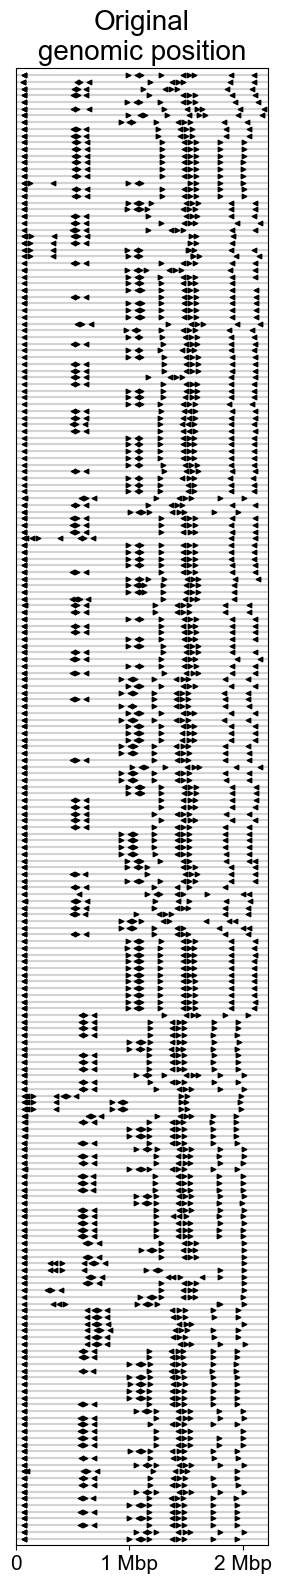

In [9]:
i = 0
colors = ['#5fb49c', '#4a5899']
plt.figure(figsize = (3, 16), frameon = False)
yticks = []
for strain in strain_order:
    df = metadata[metadata['strain']==strain]
    for strand, df2 in df.groupby('strand'):
        plt.plot([0, 2.219*10**6], [i,i], color = 'lightgrey')
        if strand == 1:
            plt.scatter(df2['start'], [i]*len(df2), color = 'k', marker = '>', s = 10, zorder = 20, alpha = 1)
        if strand == -1:
            plt.scatter(df2['start'], [i]*len(df2), color = 'k', marker = '<', s = 10, zorder = 20, alpha = 1)
    yticks.append(i)
    i+=1
plus_patch = mpatches.Patch(color=colors[0], label='forward strand')
minus_patch = mpatches.Patch(color=colors[1], label='reverse strand')
plt.xlim([0, 2.219*10**6])
plt.ylim([-1, i])
plt.xticks([0, 10**6, 2*10**6], ['0', '1 Mbp', '2 Mbp'], fontsize = 15)
# plt.yticks(ticks=yticks, labels=strain_order, fontsize = 5)
plt.yticks([])
# plt.legend(handles=[plus_patch, minus_patch], loc = (1.01, 0.9), fontsize = 15)
plt.title('Original\ngenomic position', fontsize = 20)
# plt.xlabel('Original\ngenomic position', fontsize = 20)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../../figures/loci/opa_location_original.png', dpi = 300)
plt.savefig('../../figures/loci/opa_location_original.pdf')
plt.show()

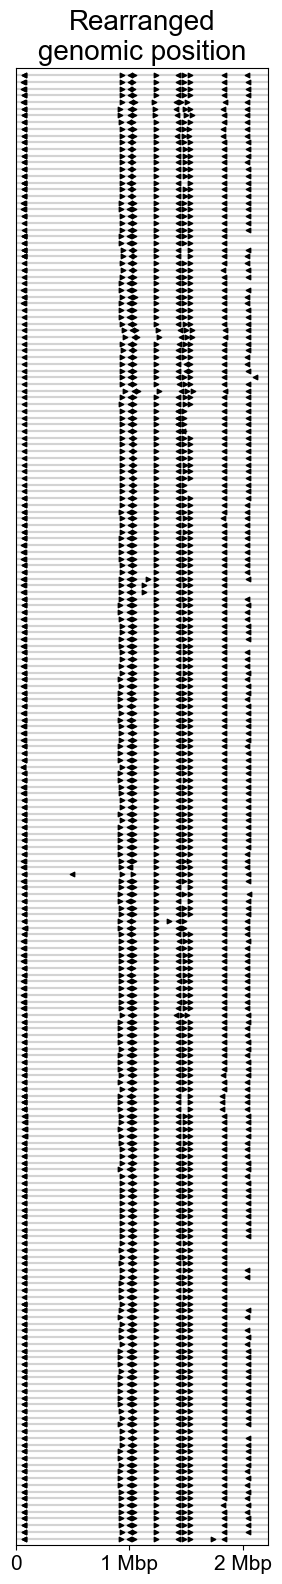

In [10]:
i = 0
colors = ['#5fb49c', '#4a5899']#['#ad6a6c', '#4a5899']
plt.figure(figsize = (3, 16), frameon = False)
yticks = []
for strain in strain_order:
    df = metadata[metadata['strain']==strain]
    for strand, df2 in df.groupby('strand_flipped'):
        plt.plot([0, 2.219*10**6], [i,i], color = 'lightgrey')
        if strand == 1:
            plt.scatter(df2['start_reordered_flipped'], [i]*len(df2), color = 'k', marker = '>', s = 10, zorder = 20, alpha = 1)
        if strand == -1:
            plt.scatter(df2['start_reordered_flipped'], [i]*len(df2), color = 'k', marker = '<', s = 10, zorder = 20, alpha = 1)
    yticks.append(i)
    i+=1
# plus_patch = mpatches.Patch(color=colors[0], label='forward strand')
# minus_patch = mpatches.Patch(color=colors[1], label='reverse strand')
plt.xlim([0, 2.219*10**6])
plt.ylim([-1, i])
plt.xticks([0, 10**6, 2*10**6], ['0', '1 Mbp', '2 Mbp'], fontsize = 15)
# plt.yticks(ticks=yticks, labels=strain_order, fontsize = 5)
plt.yticks([])
# plt.xlabel('Rearranged\ngenomic position', fontsize = 20)
# plt.legend(handles=[plus_patch, minus_patch], loc = (1.01, 0.9), fontsize = 15)
plt.title('Rearranged\ngenomic position', fontsize = 20)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig('../../figures/loci/opa_location_reordered.png', dpi = 300)
plt.savefig('../../figures/loci/opa_location_reordered.pdf')
plt.show()

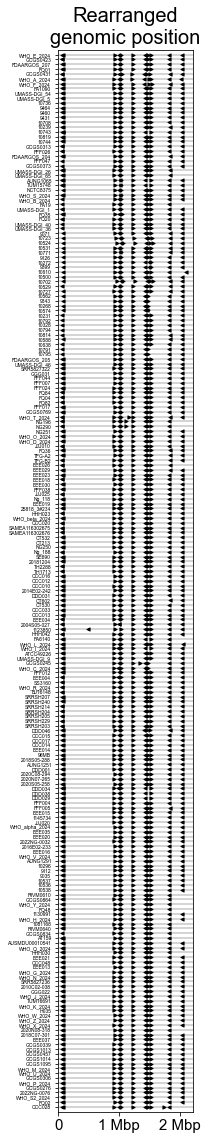

In [5]:
# Plot rearranged genomic position including isolate names to investigate genomic rearrangements in closely related isolates
i = 0
colors = ['#5fb49c', '#4a5899']#['#ad6a6c', '#4a5899']
plt.figure(figsize = (3, 16), frameon = False)
yticks = []
for strain in strain_order:
    df = metadata[metadata['strain']==strain]
    for strand, df2 in df.groupby('strand_flipped'):
        plt.plot([0, 2.219*10**6], [i,i], color = 'lightgrey')
        if strand == 1:
            plt.scatter(df2['start_reordered_flipped'], [i]*len(df2), color = 'k', marker = '>', s = 10, zorder = 20, alpha = 1)
        if strand == -1:
            plt.scatter(df2['start_reordered_flipped'], [i]*len(df2), color = 'k', marker = '<', s = 10, zorder = 20, alpha = 1)
    yticks.append(i)
    i+=1
# plus_patch = mpatches.Patch(color=colors[0], label='forward strand')
# minus_patch = mpatches.Patch(color=colors[1], label='reverse strand')
plt.xlim([0, 2.219*10**6])
plt.ylim([-1, i])
plt.xticks([0, 10**6, 2*10**6], ['0', '1 Mbp', '2 Mbp'], fontsize = 15)
plt.yticks(ticks=yticks, labels=strain_order, fontsize = 5)
# plt.yticks([])
# plt.xlabel('Rearranged\ngenomic position', fontsize = 20)
# plt.legend(handles=[plus_patch, minus_patch], loc = (1.01, 0.9), fontsize = 15)
plt.title('Rearranged\ngenomic position', fontsize = 20)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig('../../figures/loci/opa_location_reordered_with_names.png', dpi = 300)
plt.savefig('../../figures/loci/opa_location_reordered_with_names.pdf')
plt.show()

         start  start_reordered_flipped  strand_flipped locus
135    74272.0                  73749.0            -1.0     A
138   619402.0                 934452.0             1.0     C
137   542123.0                1004126.0            -1.0     D
136   500722.0                1041453.0             1.0     E
139  1277932.0                1230343.0             1.0     F
140  1476682.0                1427670.0            -1.0     G
142  1580529.0                1428502.0            -1.0     H
141  1526316.0                1483261.0             1.0     I
143  1901693.0                1832471.0            -1.0     J
144  2108134.0                2039801.0            -1.0     K


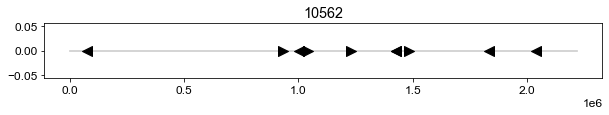

         start  start_reordered_flipped  strand_flipped locus
216    74519.0                  74015.0            -1.0     A
217   987651.0                 924758.0             1.0     C
218  1064943.0                1001785.0            -1.0     D
219  1100333.0                1037054.0             1.0     E
220  1272425.0                1232343.0             1.0     F
221  1470944.0                1431708.0            -1.0     G
222  1525185.0                1486180.0             1.0     H
223  1574693.0                1535899.0             1.0     I
224  1873449.0                1835928.0            -1.0     J
225  2079775.0                2043133.0            -1.0     K


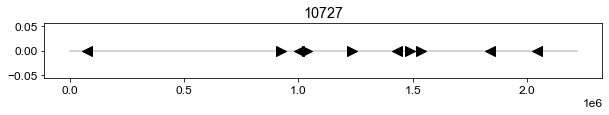

         start  start_reordered_flipped  strand_flipped locus
237    68759.0                  69051.0            -1.0     A
238    74320.0                  74636.0            -1.0     B
244  1534646.0                  75671.0            -1.0   NaN
241   985453.0                 930625.0             1.0     C
242  1062536.0                 999760.0            -1.0     D
243  1100096.0                1033448.0             1.0     E
240   326677.0                1231849.0             1.0     F
239   128920.0                1429070.0            -1.0     G
245  1584213.0                1533318.0             1.0     H
247  2003392.0                1832558.0            -1.0     J
246  1794750.0                2041517.0            -1.0     K


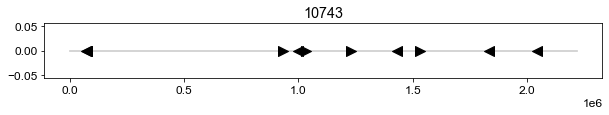

In [25]:
# Pulling out specific isolates of interest
df = metadata[metadata['strain']=='10562']
print(df[['start', 'start_reordered_flipped', 'strand_flipped', 'locus']])
plt.figure(figsize = (10, 1), frameon = False)
for strand, df2 in df.groupby('strand_flipped'):
    plt.plot([0, 2.219*10**6], [0,0], color = 'lightgrey')
    if strand == 1:
        plt.scatter(df2['start_reordered_flipped'], [0]*len(df2), color = 'k', marker = '>', s = 100, zorder = 20, alpha = 1)
    if strand == -1:
        plt.scatter(df2['start_reordered_flipped'], [0]*len(df2), color = 'k', marker = '<', s = 100, zorder = 20, alpha = 1)
plt.title('10562')
plt.show()

df = metadata[metadata['strain']=='10727']
print(df[['start', 'start_reordered_flipped', 'strand_flipped', 'locus']])
plt.figure(figsize = (10, 1), frameon = False)
for strand, df2 in df.groupby('strand_flipped'):
    plt.plot([0, 2.219*10**6], [0,0], color = 'lightgrey')
    if strand == 1:
        plt.scatter(df2['start_reordered_flipped'], [0]*len(df2), color = 'k', marker = '>', s = 100, zorder = 20, alpha = 1)
    if strand == -1:
        plt.scatter(df2['start_reordered_flipped'], [0]*len(df2), color = 'k', marker = '<', s = 100, zorder = 20, alpha = 1)
plt.title('10727')
plt.show()

df = metadata[metadata['strain']=='10743']
print(df[['start', 'start_reordered_flipped', 'strand_flipped', 'locus']])
plt.figure(figsize = (10, 1), frameon = False)
for strand, df2 in df.groupby('strand_flipped'):
    plt.plot([0, 2.219*10**6], [0,0], color = 'lightgrey')
    if strand == 1:
        plt.scatter(df2['start_reordered_flipped'], [0]*len(df2), color = 'k', marker = '>', s = 100, zorder = 20, alpha = 1)
    if strand == -1:
        plt.scatter(df2['start_reordered_flipped'], [0]*len(df2), color = 'k', marker = '<', s = 100, zorder = 20, alpha = 1)
plt.title('10743')
plt.show()